In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#color palette
monokai_colors=['#a6e22e','#f92672','#66d9ef','#fd971f','#ae81ff','#e6db74',"#fd5ff0",'#a1efe4','#272828','#75715e']


In [21]:
##### Exploratory analysis

diabetes=pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

#cleaning data
diabetes=diabetes.dropna()

diabetes_yes=diabetes.drop(index=(diabetes[diabetes['Diabetes_binary']!=1]).index)
diabetes_no=diabetes.drop(index=(diabetes[diabetes['Diabetes_binary']!=0]).index)

# dropping quantiles sup 5% and low 5%
q=diabetes_yes['BMI'].quantile(1-0.05)
diabetes_yes=diabetes_yes[diabetes_yes['BMI']<q]
q=diabetes_yes['BMI'].quantile(0.05)
diabetes_yes=diabetes_yes[diabetes_yes['BMI']>q]

q=diabetes_no['BMI'].quantile(1-0.05)
diabetes_no=diabetes_no[diabetes_no['BMI']<q]
q=diabetes_no['BMI'].quantile(0.05)
diabetes_no=diabetes_no[diabetes_no['BMI']>q]


In [22]:
#fig 1 EDA

#axs1_0
boxes0=[diabetes_yes['BMI'],diabetes_no['BMI']]
labels0=["Diabetics",'Non diabetics']

#axs1_1
diabetics_health_issues=diabetes_yes[['HighBP','HighChol','Stroke','HeartDiseaseorAttack','DiffWalk']]
diabetics_health_issues_count=pd.DataFrame(columns=['Affected'])
diabetics_health_issues_count['Affected']=round((diabetics_health_issues.sum()/diabetics_health_issues.shape[0])*100,1)
diabetics_health_issues_count['Not_affected']=(100-diabetics_health_issues_count['Affected'])

bars1_0=diabetics_health_issues_count['Affected'].tolist()
bars1_1=diabetics_health_issues_count['Not_affected'].tolist()
labels1=['High blood\n preassure','High\n cholesterol','Suffered\n stroke','Hearth\n disease','Difficulty\n walking']

#labels1=diabetics_health_issues_count.index.tolist()

#axs1_2
non_diabetics_health_issues=diabetes_no[['HighBP','HighChol','Stroke','HeartDiseaseorAttack','DiffWalk']]
non_diabetics_health_issues_count=pd.DataFrame(columns=['Affected'])
non_diabetics_health_issues_count['Affected']=round((non_diabetics_health_issues.sum()/non_diabetics_health_issues.shape[0])*100,1)
non_diabetics_health_issues_count['Not_affected']=(100-non_diabetics_health_issues_count['Affected'])

bars2_0=non_diabetics_health_issues_count['Affected'].tolist()
bars2_1=non_diabetics_health_issues_count['Not_affected'].tolist()
labels2=['High blood\n preassure','High\n cholesterol','Suffered\n stroke','Hearth\n disease','Difficulty\n walking']

#axs1_3
hist1=(21+(diabetes_yes['Age']-1)*5)
median_age=hist1.median()
bins1=[20,30,40,50,60,70,80]

#axs1_3
diabetics_lifestyle=diabetes_yes[['Smoker','Fruits','Veggies','HvyAlcoholConsump','PhysActivity']]
diabetics_lifestyle_count=pd.DataFrame(columns=['Yes'])
diabetics_lifestyle_count['Yes']=round((diabetics_lifestyle.sum()/diabetics_lifestyle.shape[0])*100,1)
diabetics_lifestyle_count['No']=(100-diabetics_lifestyle_count['Yes'])

bars3_0=diabetics_lifestyle_count["Yes"]
bars3_1=diabetics_lifestyle_count["No"]
labels3=['Smoker','Daily fruits','Daily vegetables','Heavy drinker','Exercise']

#axs1_4
non_diabetics_lifestyle=diabetes_no[['Smoker','Fruits','Veggies','HvyAlcoholConsump','PhysActivity']]
non_diabetics_lifestyle_count=pd.DataFrame(columns=['Yes'])
non_diabetics_lifestyle_count['Yes']=round((non_diabetics_lifestyle.sum()/non_diabetics_lifestyle.shape[0])*100,1)
non_diabetics_lifestyle_count['No']=(100-non_diabetics_lifestyle_count['Yes'])

bars4_0=non_diabetics_lifestyle_count["Yes"]
bars4_1=non_diabetics_lifestyle_count["No"]
labels4=['Smoker','Daily fruits','Daily vegetables','Heavy drinker','Exercise']

#axs1_5
sex_diabetes=diabetes_yes['Sex']
slices0=[diabetes_yes['Sex'].sum(),diabetes_yes.shape[0]-diabetes_yes['Sex'].sum()]
labels5=["Male",'Female']

#axs1_6
diabetes_yes['Income']=diabetes_yes["Income"].map({1:0,2:10000,3:15000,4:20000,5:25000,6:35000,7:50000,8:75000})
hist2=diabetes_yes['Income']
median_income_yes=hist2.median()
bins2=[0,10000,15000,20000,25000,35000,50000,75000]


#axs1_7
diabetes_no['Income']=diabetes_no["Income"].map({1:0,2:10000,3:15000,4:20000,5:25000,6:35000,7:50000,8:75000})
hist3=diabetes_no['Income']
median_income_no=hist3.median()

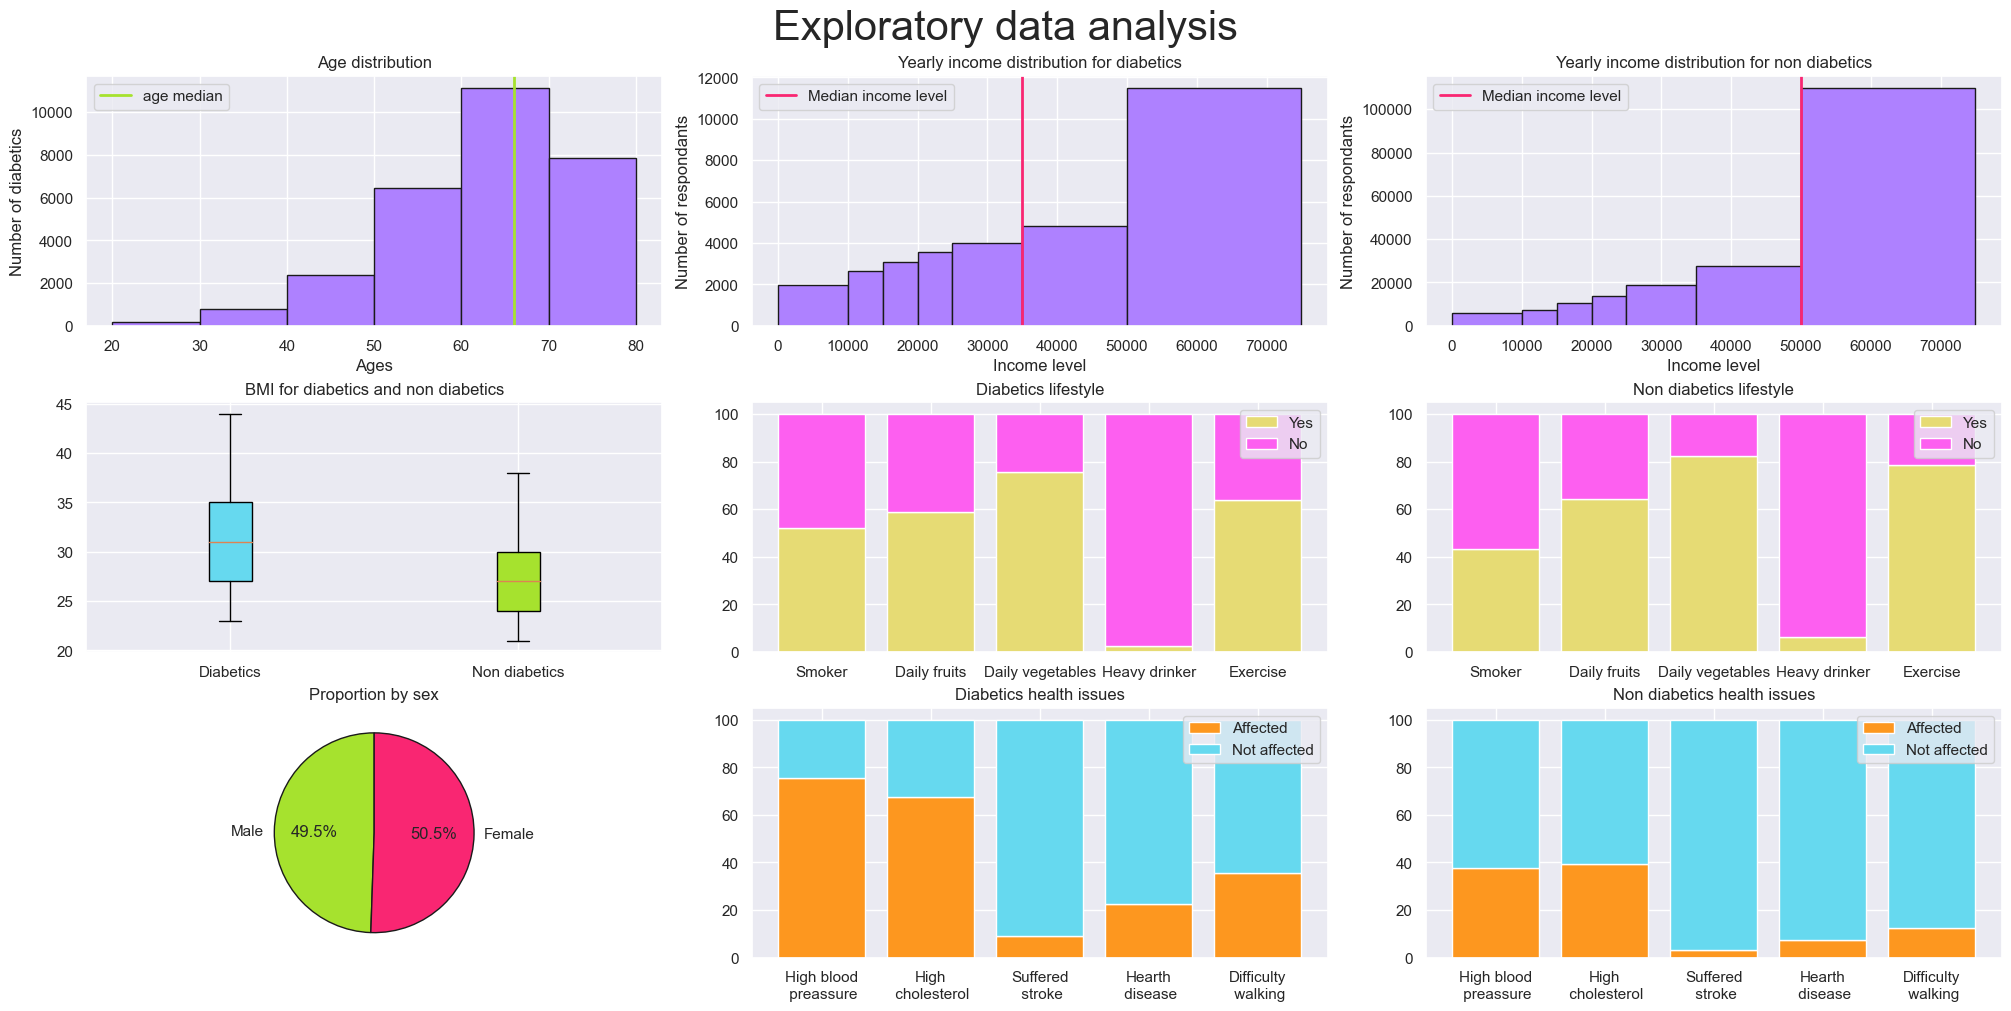

In [23]:
fig1=plt.figure(constrained_layout=True, figsize=(20,10))
axs1=fig1.add_gridspec(3,3)

axs1_0=fig1.add_subplot(axs1[1,0])
bplot1=axs1_0.boxplot(boxes0,
labels=labels0,patch_artist=True
)
axs1_0.set_title('BMI for diabetics and non diabetics')

for bplot in bplot1:
    for patch,color in zip(bplot1['boxes'],[monokai_colors[2],monokai_colors[0]]):
        patch.set_facecolor(color)

axs1_1=fig1.add_subplot(axs1[2,1])
axs1_1.bar(labels1,bars1_0,color=monokai_colors[3])
axs1_1.bar(labels1,bars1_1,bottom=bars1_0,color=monokai_colors[2])
axs1_1.legend(labels=['Affected','Not affected'],loc='best')
axs1_1.set_title('Diabetics health issues')

axs1_2=fig1.add_subplot(axs1[2,2])
axs1_2.bar(labels2,bars2_0,color=monokai_colors[3])
axs1_2.bar(labels2,bars2_1,bottom=bars2_0,color=monokai_colors[2])
axs1_2.legend(labels=['Affected','Not affected'],loc='best')
axs1_2.set_title('Non diabetics health issues')

axs1_3=fig1.add_subplot(axs1[0,0])
axs1_3.hist(hist1,edgecolor='k',color=monokai_colors[4],bins=bins1)
axs1_3.axvline(median_age,color=monokai_colors[0],label='age median',linewidth=2)
axs1_3.legend()
axs1_3.set_title('Age distribution')
axs1_3.set_ylabel('Number of diabetics')
axs1_3.set_xlabel('Ages')

axs1_4=fig1.add_subplot(axs1[1,1])
axs1_4.bar(labels3,bars3_0,color=monokai_colors[5])
axs1_4.bar(labels3,bars3_1,bottom=bars3_0,color=monokai_colors[6])
axs1_4.legend(labels=['Yes','No'],loc='best')
axs1_4.set_title('Diabetics lifestyle')

axs1_5=fig1.add_subplot(axs1[1,2])
axs1_5.bar(labels4,bars4_0,color=monokai_colors[5])
axs1_5.bar(labels4,bars4_1,bottom=bars4_0,color=monokai_colors[6])
axs1_5.legend(labels=['Yes','No'],loc='best')
axs1_5.set_title('Non diabetics lifestyle')

axs1_6=fig1.add_subplot(axs1[2,0])
axs1_6.pie(slices0,labels=labels5,
colors=monokai_colors,
autopct='%1.1f%%',
startangle=90,
wedgeprops={'edgecolor':'k'})
axs1_6.set_title('Proportion by sex')

axs1_7=fig1.add_subplot(axs1[0,1])
axs1_7.hist(hist2,edgecolor='k',color=monokai_colors[4],bins=bins2)
axs1_7.axvline(median_income_yes,color=monokai_colors[1],label='Median income level',linewidth=2)
axs1_7.legend()
axs1_7.set_title('Yearly income distribution for diabetics')
axs1_7.set_ylabel('Number of respondants')
axs1_7.set_xlabel('Income level')

axs1_8=fig1.add_subplot(axs1[0,2])
axs1_8.hist(hist3,edgecolor='k',color=monokai_colors[4],bins=bins2)
axs1_8.axvline(median_income_no,color=monokai_colors[1],label='Median income level',linewidth=2)
axs1_8.legend()
axs1_8.set_title('Yearly income distribution for non diabetics')
axs1_8.set_ylabel('Number of respondants')
axs1_8.set_xlabel('Income level')

fig1.suptitle('Exploratory data analysis',size=30)

plt.show()

In [24]:

diabetes_genhlth=pd.DataFrame(diabetes_yes.groupby(['GenHlth']).count()['Age'])
diabetes_genhlth=diabetes_genhlth.rename(columns={'Age':'value'})
diabetes_genhlth['percentage']=round((diabetes_genhlth['value']/diabetes_genhlth['value'].sum())*100,1)

bars1_0=diabetes_genhlth['percentage']
labels1=['Excelent','Very good','Good','Fair','Poor']

#axs_2_1
no_diabetes_genhlth=pd.DataFrame(diabetes_no.groupby(['GenHlth']).count()['Age'])
no_diabetes_genhlth=no_diabetes_genhlth.rename(columns={'Age':'value'})
no_diabetes_genhlth['percentage']=round((no_diabetes_genhlth['value']/no_diabetes_genhlth['value'].sum())*100,1)

bars2_0=no_diabetes_genhlth['percentage']
labels2=['Excelent','Very good','Good','Fair','Poor']

#axs2_2
diabetes_physhlth=diabetes_yes['PhysHlth']
#print(diabetes_physhlth)
days_median1=diabetes_physhlth.median()
days_mean1=diabetes_physhlth.mean()
bins1=[0,5,10,15,20,25,30]

#axs2_3
no_diabetes_physhlth=diabetes_no['PhysHlth']
days_median2=no_diabetes_physhlth.median()
days_mean2=no_diabetes_physhlth.mean()


#axs2_4
diabetes_menthlth=diabetes_yes['MentHlth']
days_median3=diabetes_menthlth.median()
days_mean3=diabetes_menthlth.mean()

#axs2_5
no_diabetes_menthlth=diabetes_no['MentHlth']
days_median4=diabetes_menthlth.median()
days_mean4=diabetes_menthlth.mean()

#axs2_6
diabetes_no_doc=round(diabetes_yes['NoDocbcCost'].sum()/diabetes_yes.shape[0]*100,1)
diabetes_yes_doc=100-diabetes_no_doc
diabetes_yes_hc=round(diabetes_yes['AnyHealthcare'].sum()/diabetes_yes.shape[0]*100,1)
diabetes_no_hc=100-diabetes_yes_hc

bars3_1=[diabetes_no_doc,diabetes_no_hc]
bars3_0=[diabetes_yes_doc,diabetes_yes_hc]
labels3=["Could afford doctor\n every time this year",'Has insurance' ]

#axs2_6
no_diabetes_no_doc=round(diabetes_no['NoDocbcCost'].sum()/diabetes_no.shape[0]*100,1)
no_diabetes_yes_doc=100-no_diabetes_no_doc

no_diabetes_yes_hc=round(diabetes_no['AnyHealthcare'].sum()/diabetes_no.shape[0]*100,1)
no_diabetes_no_hc=100-no_diabetes_yes_hc

bars4_1=[no_diabetes_no_doc,no_diabetes_no_hc]
bars4_0=[no_diabetes_yes_doc,no_diabetes_yes_hc]
labels4=["Could afford doctor\n every time this year",'Has insurance']


Text(0.5, 0.98, 'Exploratory Data Analysis')

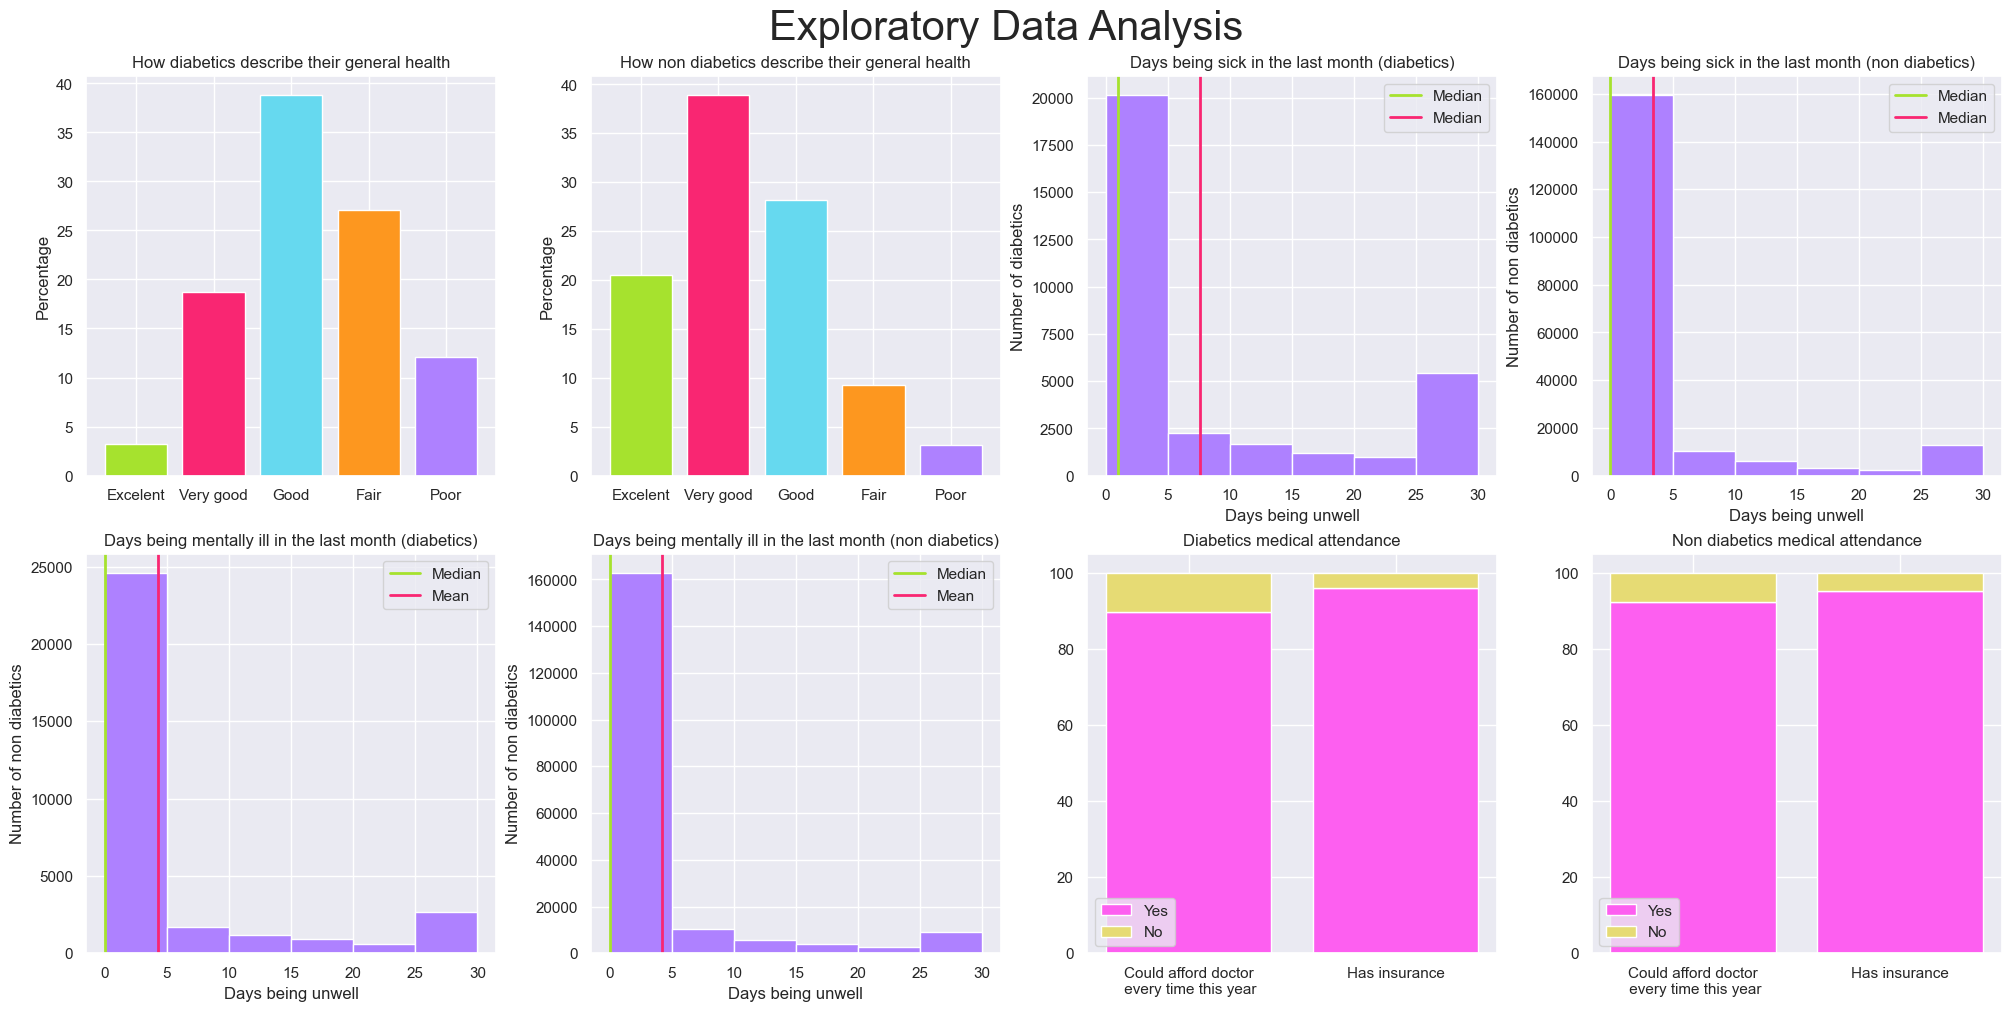

In [25]:

fig2=plt.figure(constrained_layout=True,figsize=(20,10))
axs2=fig2.add_gridspec(2,4)

axs2_0=fig2.add_subplot(axs2[0,0])
axs2_0.bar(height=bars1_0,x=labels1,color=monokai_colors)
axs2_0.set_title('How diabetics describe their general health')
axs2_0.set_ylabel('Percentage')

axs2_1=fig2.add_subplot(axs2[0,1])
axs2_1.bar(height=bars2_0,x=labels2,color=monokai_colors)
axs2_1.set_title('How non diabetics describe their general health')
axs2_1.set_ylabel('Percentage')

axs2_2=fig2.add_subplot(axs2[0,2])
axs2_2.hist(diabetes_physhlth,bins=bins1,color=monokai_colors[4])
axs2_2.axvline(days_median1,color=monokai_colors[0],label='Median',linewidth=2)
axs2_2.axvline(days_mean1,color=monokai_colors[1],label='Median',linewidth=2)
axs2_2.set_title('Days being sick in the last month (diabetics)')
axs2_2.set_ylabel('Number of diabetics')
axs2_2.set_xlabel("Days being unwell")
axs2_2.legend()

axs2_3=fig2.add_subplot(axs2[0,3])
axs2_3.hist(no_diabetes_physhlth,bins=bins1,color=monokai_colors[4])
axs2_3.axvline(days_median2,color=monokai_colors[0],label='Median',linewidth=2)
axs2_3.axvline(days_mean2,color=monokai_colors[1],label='Median',linewidth=2)
axs2_3.set_title('Days being sick in the last month (non diabetics)')
axs2_3.set_ylabel('Number of non diabetics')
axs2_3.set_xlabel("Days being unwell")
axs2_3.legend()

axs2_4=fig2.add_subplot(axs2[1,0])
axs2_4.hist(diabetes_menthlth,bins=bins1,color=monokai_colors[4])
axs2_4.axvline(days_median3,color=monokai_colors[0],label='Median',linewidth=2)
axs2_4.axvline(days_mean3,color=monokai_colors[1],label='Mean',linewidth=2)
axs2_4.set_title('Days being mentally ill in the last month (diabetics)')
axs2_4.set_ylabel('Number of non diabetics')
axs2_4.set_xlabel("Days being unwell")
axs2_4.legend()

axs2_5=fig2.add_subplot(axs2[1,1])
axs2_5.hist(no_diabetes_menthlth,bins=bins1,color=monokai_colors[4])
axs2_5.axvline(days_median4,color=monokai_colors[0],label='Median',linewidth=2)
axs2_5.axvline(days_mean4,color=monokai_colors[1],label='Mean',linewidth=2)
axs2_5.set_title('Days being mentally ill in the last month (non diabetics)')
axs2_5.set_ylabel('Number of non diabetics')
axs2_5.set_xlabel("Days being unwell")
axs2_5.legend()

axs2_6=fig2.add_subplot(axs2[1,2])
axs2_6.bar(labels3,bars3_0,color=monokai_colors[6])
axs2_6.bar(labels4,bars3_1,bottom=bars3_0,color=monokai_colors[5])
axs2_6.legend(labels=['Yes','No'],loc='lower left')
axs2_6.set_title('Diabetics medical attendance')

axs2_7=fig2.add_subplot(axs2[1,3])
axs2_7.bar(labels4,bars4_0,color=monokai_colors[6])
axs2_7.bar(labels4,bars4_1,bottom=bars4_0,color=monokai_colors[5])
axs2_7.legend(labels=['Yes','No'],loc='best')
axs2_7.set_title('Non diabetics medical attendance')

fig2.suptitle("Exploratory Data Analysis",size=30)

Text(0.5, 0.98, 'Correlation heatmap')

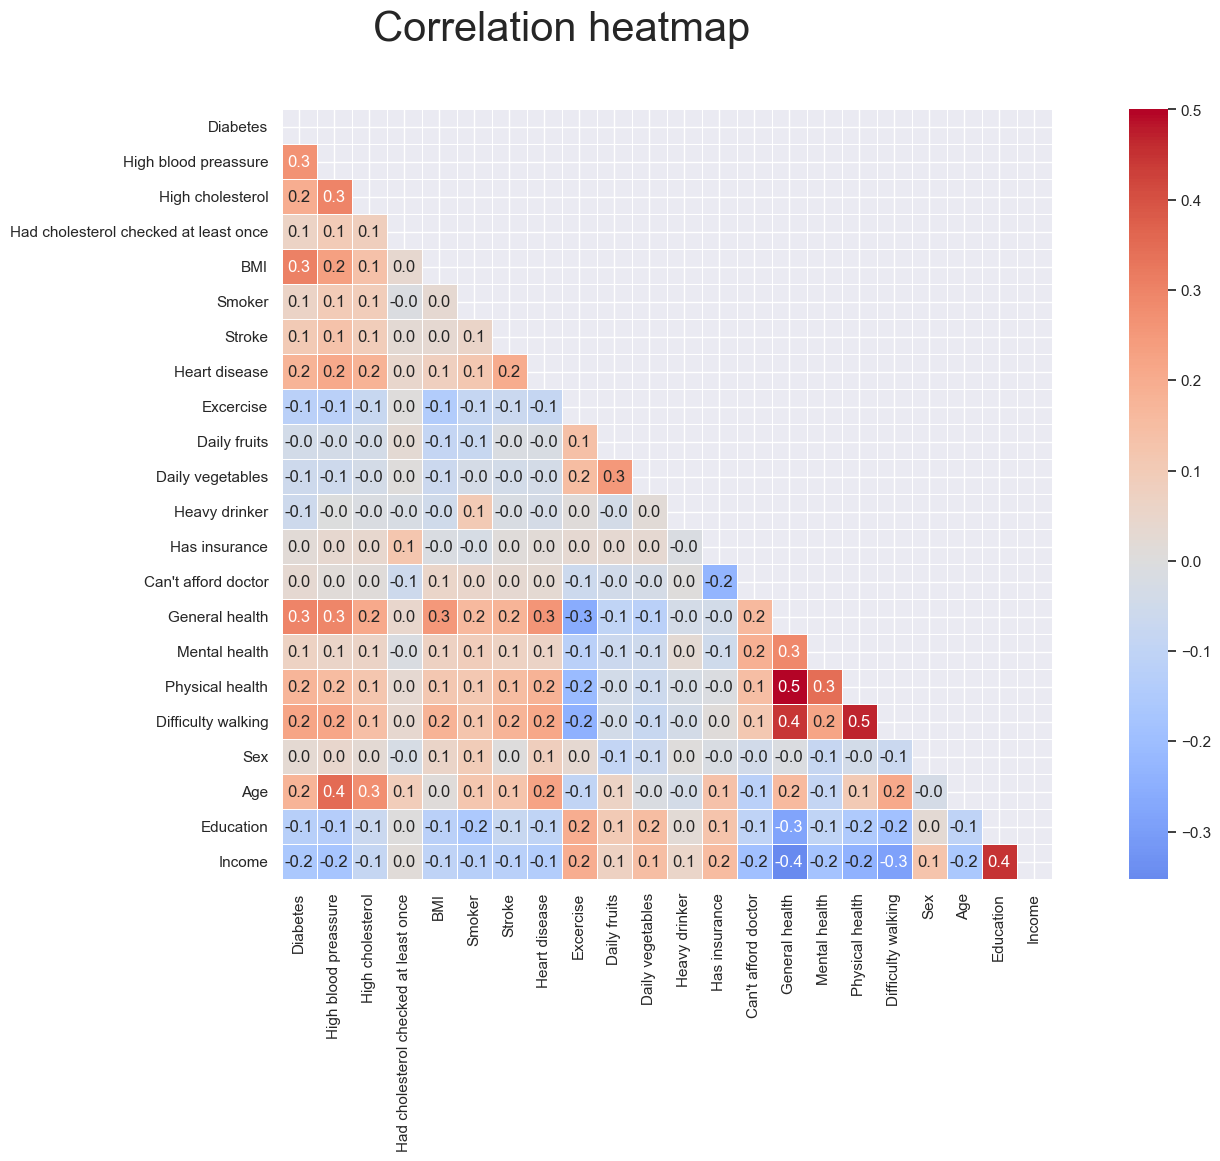

In [26]:
df_heat=pd.concat([diabetes_yes,diabetes_no])
df_heat=df_heat.reset_index(drop=True)

df_heat=df_heat.rename(columns={'Diabetes_binary':'Diabetes','HighBP':'High blood preassure','HighChol':'High cholesterol',
'HeartDiseaseorAttack':'Heart disease','PhysActivity':'Excercise','Fruits':'Daily fruits','Veggies':'Daily vegetables','HvyAlcoholConsump':'Heavy drinker',
'DiffWalk':'Difficulty walking','AnyHealthcare':'Has insurance','NoDocbcCost':"Can't afford doctor",'GenHlth':'General health',
'MentHlth':'Mental health','PhysHlth':'Physical health','CholCheck':'Had cholesterol checked at least once'})

corr_1=df_heat.corr()
mask_1=np.triu(corr_1)

fig3, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_1,mask=mask_1,fmt='.1f',vmax=0.5,linewidths=.5,
square=True,cbar={'shrink':0.5},annot=True,
center=0,cmap='coolwarm')
fig3.suptitle('Correlation heatmap',size=30)